# [ Classification with Iris Dataset 🌺 ]

## Table of contents
* [Data Pre-processing](#1.-data-pre-processing)
+ [Data Visualization](#2.-data-visualization)
- [Models](#3.-models)

    1. Logistic Regression
    2. SVM
    3. Decision Tree
    4. Random Forest
    5. k-Nearest Neighbors
    
- [Conclusions](#4.-conclusions)

---

# 1. Data Pre-processing

## - Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from pandas.plotting import parallel_coordinates, andrews_curves
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## - Loading the data

In [2]:
data = pd.read_csv("Dataset/Iris.csv")

## - Exploring the data

In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# The number of instances that belong to each class
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## - Removing the unneeded column 'Id'

In [8]:
data.drop('Id', axis=1, inplace=True)

In [9]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## - Dividing data into features / labels
- Now, data contains 5 columns : SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species.
- The actual features are described by columns 0-3.
- Last column contains labels of samples.
- We need to split data into two arrays: X (features) and y (labels).

In [10]:
X = data.iloc[:, :4].values
y = data.iloc[:, 4].values

## - Label encoding
Labels are categorical. We need to use **LabelEncoder** to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [11]:
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## - Splitting data into training / test set
To check later on whether or not our classifiers work correctly.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

---

# 2. Data Visualization

## - Parallel coordinates plot

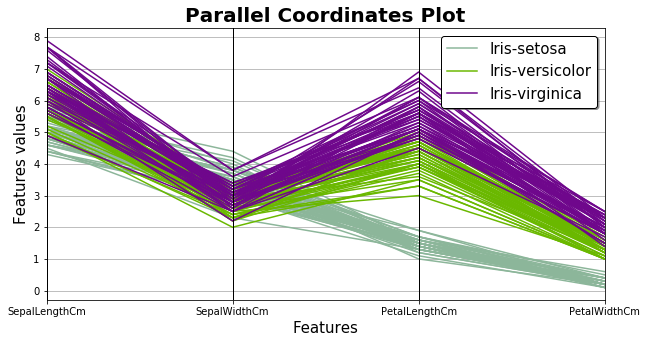

In [14]:
plt.figure(figsize=(10, 5))
parallel_coordinates(data, "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

## - Andrews curves plot

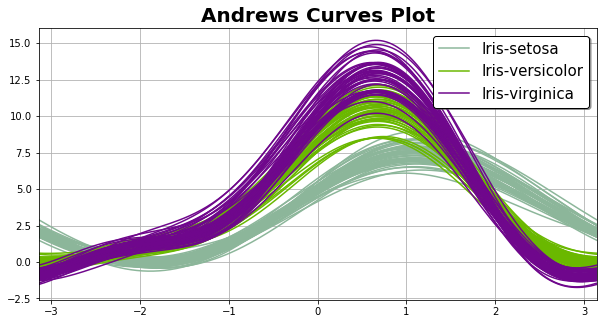

In [15]:
plt.figure(figsize=(10, 5))
andrews_curves(data, "Species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

## - Pairplot
Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.

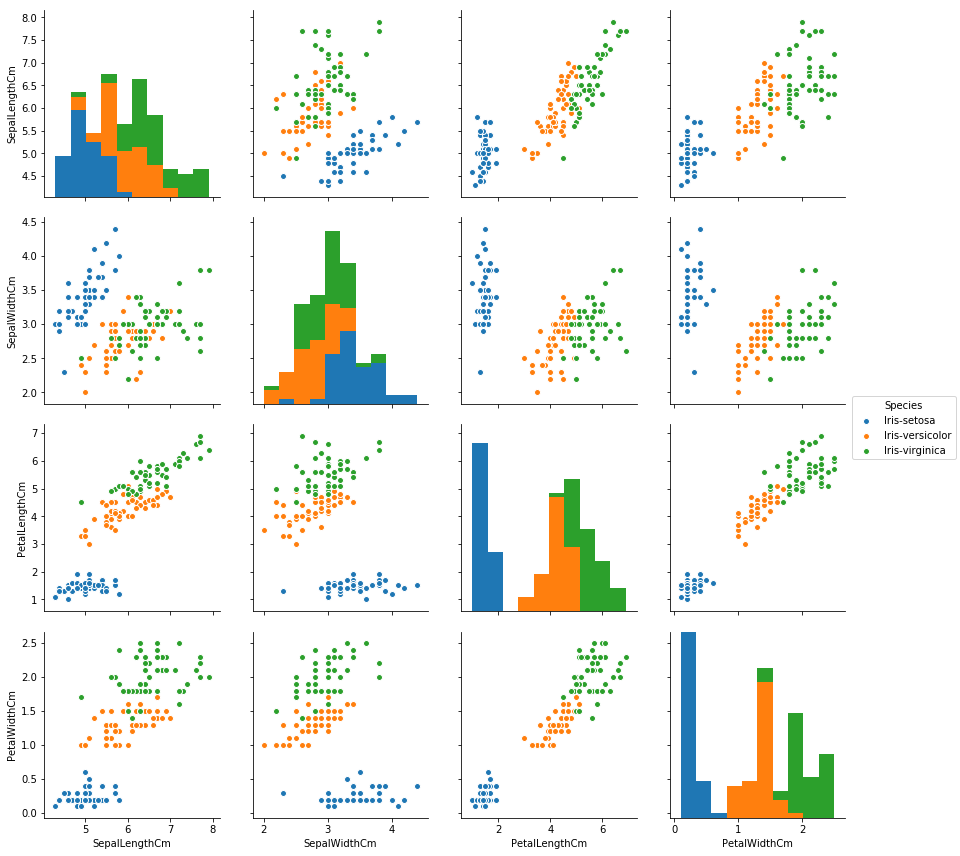

In [16]:
sns.pairplot(data, hue="Species", size=3)

## - Violin plot

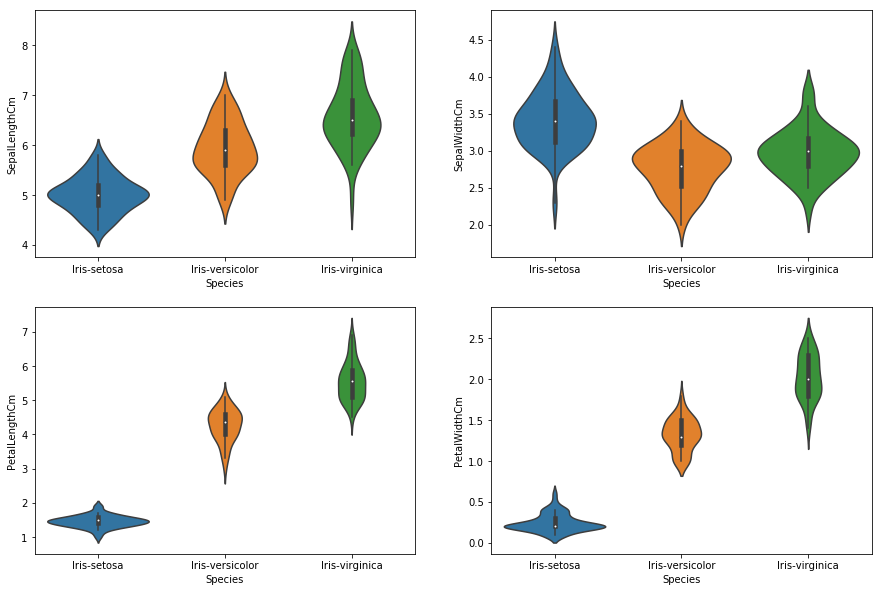

In [17]:
plt.figure(figsize=(15, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='Species', y=data.iloc[:, i], data=data)

---

# 3. Models

1. Fitting the model
2. Making predictions
3. Evaluating predictions

## 1) Logistic Regression

In [18]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [19]:
print('The accuracy of the Logistic Regression :', round(accuracy_score(y_test, y_pred) * 100, 2))

The accuracy of the Logistic Regression : 96.67


## 2) SVM (Support Vector Machine)

In [20]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [21]:
print('The accuracy of the SVM :', round(accuracy_score(y_test, y_pred) * 100, 2))

The accuracy of the SVM : 100.0


## 3) Decision Tree

In [22]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [23]:
print('The accuracy of the Decision Tree :', round(accuracy_score(y_test, y_pred) * 100, 2))

The accuracy of the Decision Tree : 100.0


## 4) Random Forest

In [24]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [25]:
print('The accuracy of the Random Forest :', round(accuracy_score(y_test, y_pred) * 100, 2))

The accuracy of the Random Forest : 100.0


## 5) k-NN (k-Nearest Neighbors)

#### * Algorithm Steps
1. Choose the number of neighbors K.
2. Take the K nearest neighbors of the new data point, according to distance metric.
3. Among these K neighbors, count the number of data points to each category.
4. Assign the new data point to the category where you counted the most neighbors.

In [26]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [27]:
print('The accuracy of the k-NN (k=3) :', round(accuracy_score(y_test, y_pred) * 100, 2))

The accuracy of the k-NN (k=3) : 96.67


### - Evaluate a score by cross-validation

In [28]:
k_list = list(range(1, 50, 2))
cv_scores = []

for k in k_list:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [29]:
# Changing to misclassification error
MSE = [1 - x for x in cv_scores]

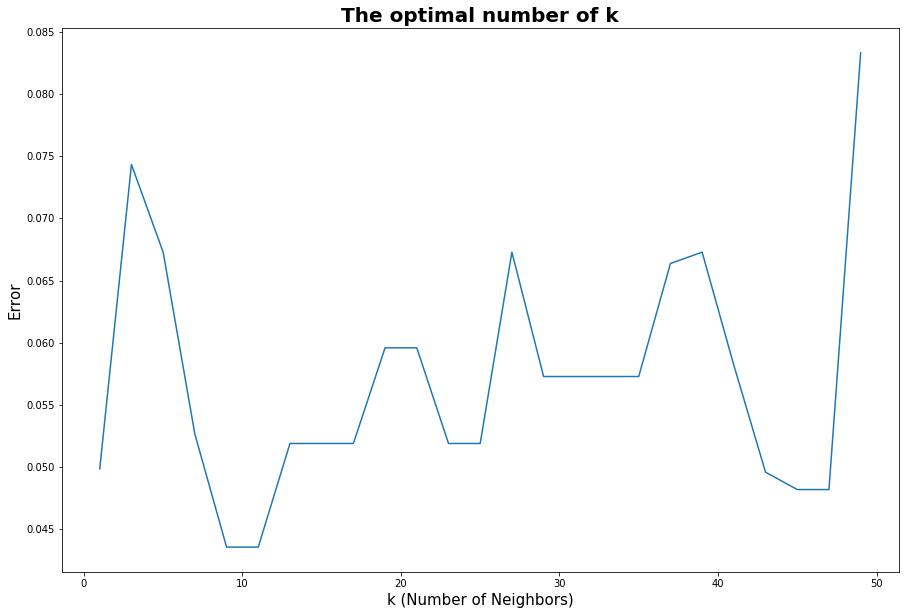

In [30]:
plt.figure(figsize=(15, 10))
plt.title('The optimal number of k', fontsize=20, fontweight='bold')
plt.xlabel('k (Number of Neighbors)', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.plot(k_list, MSE)
plt.show()

In [31]:
# Finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors : " + str(best_k))

The optimal number of neighbors : 9


### - k-NN classifier with the optimal k

In [32]:
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [33]:
print('The accuracy of the k-NN (k=9) :', round(accuracy_score(y_test, y_pred) * 100, 2))

The accuracy of the k-NN (k=9) : 100.0


---

# 4. Conclusions

| Model                 | Accuracy      | 
| -------------         |:-------------:|
| Logistic Regression   | 96.67%        |
| SVM                   | 100%          |
| Decision Tree         | 100%          |
| Random Forest         | 100%          |
| k-NN (k=3)            | 96.67%        |
| k-NN (k=9)            | 100%          |